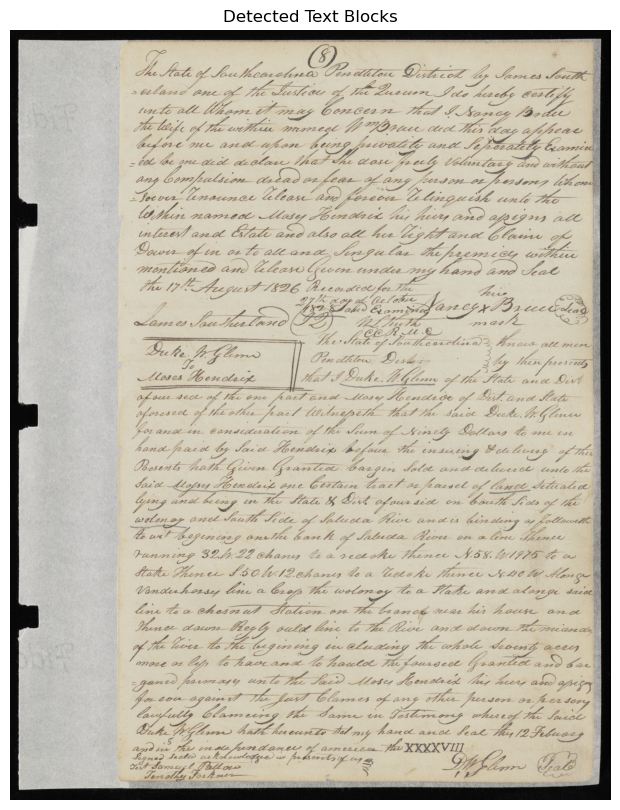

In [6]:
import os
import easyocr
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = "images/dupickens_a-1_043.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to invert the image
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected text blocks
for contour in contours:
    # Get the bounding box for each contour
    x, y, w, h = cv2.boundingRect(contour)
    # Filter out small contours that may not be part of text
    if w > 50 and h > 10:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Text Blocks")
plt.axis("off")
plt.show()


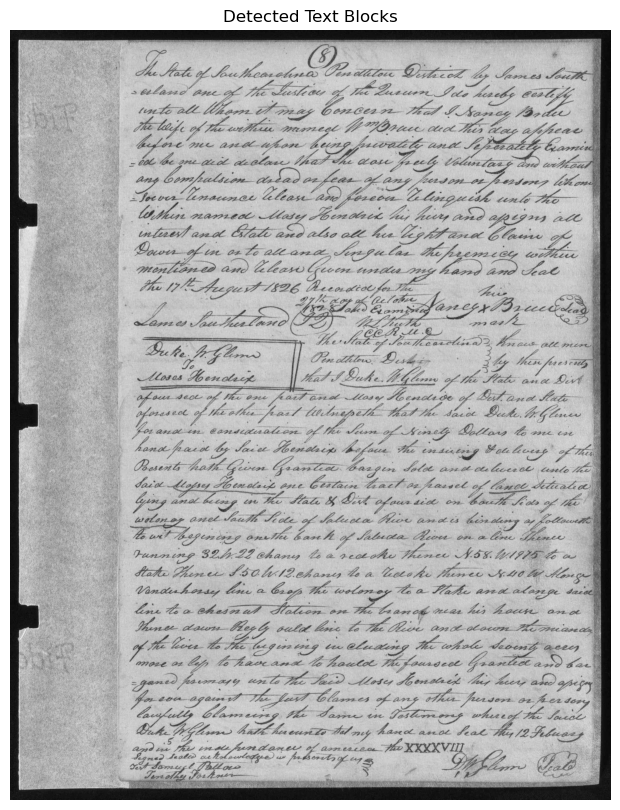

In [8]:
import os
import easyocr
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "compressed_images/dupickens_a-1_043.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY_INV, 11, 2)

# Dilate the image to connect text regions
kernel = np.ones((5, 5), np.uint8)
dilated = cv2.dilate(adaptive_thresh, kernel, iterations=1)

# Find contours in the dilated image
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around detected text blocks
for contour in contours:
    # Get the bounding box for each contour
    x, y, w, h = cv2.boundingRect(contour)
    # Filter out small contours by area
    area = cv2.contourArea(contour)
    aspect_ratio = w / h
    if area > 100 and 0.2 < aspect_ratio < 5:  # Adjust based on text block properties
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Text Blocks")
plt.axis("off")
plt.show()
